In [1]:
# Load libraries
import os            # operating system lib
import tarfile       # archives lib
import urllib        # url handling
import pandas as pd  # Pandas
import numpy as np   # NumPy
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

# Define variables
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# Define function
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
# Call the function to fetch data
fetch_housing_data()

In [3]:
# Define function to load data using Panda
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
# Load fetched data
housing = load_housing_data()

In [5]:
# Import sklearn library
from sklearn.model_selection import train_test_split

# Split the dataset into train and test using 20% threshold
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

## The Normal Equation

### Model: $medianHouseValue = b_0 + b_1*medianIncome$

In [6]:
medianIncome = train_set["median_income"]
medianHouseValue = train_set["median_house_value"]

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lin_reg = LinearRegression()

In [9]:
X = np.matrix(medianIncome).reshape(-1,1)
y = np.matrix(medianHouseValue).reshape(-1,1)

In [10]:
lin_reg.fit(X, y)

LinearRegression()

In [11]:
b0 = lin_reg.intercept_
b1 = lin_reg.coef_

In [12]:
from IPython.display import Markdown as md
md("### Estimated model: $medianHouseValue = {} + {}*medianIncome$".format(round(b0[0],2),round(b1[0][0],2)))

### Estimated model: $medianHouseValue = 44459.73 + 41933.85*medianIncome$

## Stochastic Gradient Descent

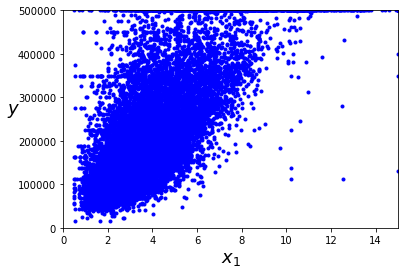

In [44]:
# set path array
theta_path_sgd = []
m = len(X)
np.random.seed(42)
X_b = np.c_[np.ones((m, 1)), X]  # add x0 = 1 to each instance

# number of iterations
n_epochs = 100
t0, t1 = 10, 100  # learning schedule hyperparameters

# Function that determines the learning rate at each iteration
def learning_schedule(t):
    return t0 / (t + t1)

# start with randomly generated starting parameters theta
theta = np.random.randn(2,1)  # random initialization
# loop over iterations
for epoch in range(n_epochs):
    # add theta to the vector
    theta_path_sgd.append(theta) 

    # loop over observations. Here we loop over all observations, we can just had a few draw, like range(20)
    for i in range(m):
        # Randomly select number between 1 and m.
        random_index = np.random.randint(m)
        # extract randomly selected observation for x
        xi = X_b[random_index:random_index+1]
        # extract randomly selected observation for y
        yi = y[random_index:random_index+1]
        # Calculate gradient for randomly selected observations
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        # Tolerance level
        eta = learning_schedule(epoch * m + i)
        #print(eta)
        # update theta
        theta = theta - eta * gradients


plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, max(X), 0, max(y)])                              # not shown
plt.show()    

In [45]:
thetapath = np.array(theta_path_sgd)

In [46]:
print('X')
print(thetapath[10][0])
print(thetapath[20][0])
print(thetapath[80][0])
print(thetapath[90][0])
print(thetapath[99][0])
print('Y')
print(thetapath[10][1])
print(thetapath[20][1])
print(thetapath[80][1])
print(thetapath[90][1])
print(thetapath[99][1])

X
[44761.18716984]
[44862.64564382]
[44458.52898923]
[44476.47048977]
[44574.39870623]
Y
[41798.2084713]
[42972.62312563]
[42344.83349407]
[41548.56095645]
[41584.23321149]


In [15]:
thetapath[99,:]

array([[44574.39870623],
       [41584.23321149]])

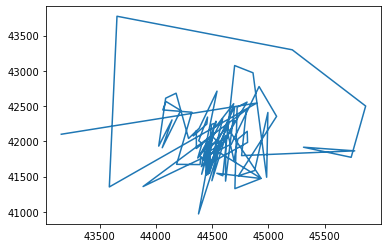

In [16]:
# All 100 steps
plt.plot(thetapath[1:99,0],thetapath[1:99,1])

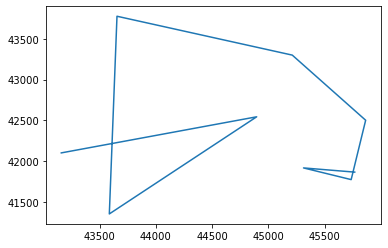

In [17]:
# First 10 steps of iteration 1
plt.plot(thetapath[1:10,0],thetapath[1:10,1])

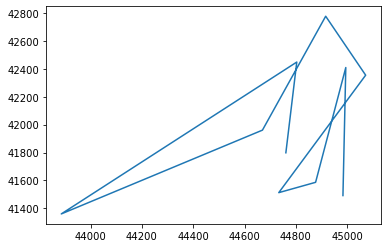

In [18]:
#10-20 steps
plt.plot(thetapath[10:20,0],thetapath[10:20,1])

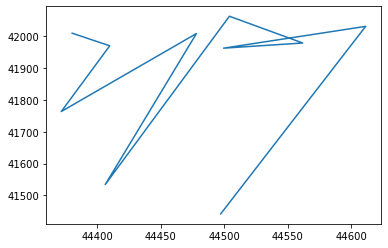

In [19]:
#70-80 steps
plt.plot(thetapath[70:80,0],thetapath[70:80,1])

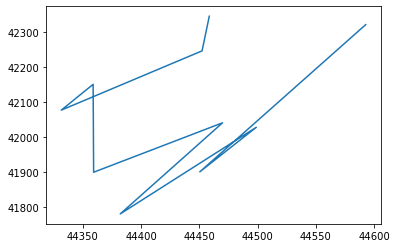

In [20]:
#80-90 steps
plt.plot(thetapath[80:90,0],thetapath[80:90,1])

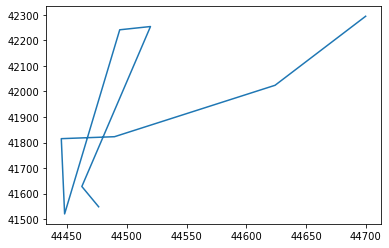

In [21]:
# Last 10 steps
plt.plot(thetapath[90:99,0],thetapath[90:99,1])

## Lasso Regression

In [70]:
# Load fetched data
housing = load_housing_data()

In [71]:
housing.dropna(inplace=True)

In [72]:
y = housing["median_house_value"]

In [73]:
# Create "rate" variables
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

# Create dummy variables
housing_n = pd.concat([housing.drop("ocean_proximity", axis=1), pd.get_dummies(housing["ocean_proximity"])], axis=1)
# Drop the fifth dummy var
housing_n = housing_n.drop(["NEAR OCEAN","median_house_value"], axis=1)

In [74]:
X = housing_n

In [87]:
alpha_list = [ 30, 40, 200, 300, 400, 500, 600, 700, 800, 900, 1000 ]
for i in alpha_list:
    print('Processing alpha=' + str(i))
    print('---------------------')
    clf=Lasso(alpha=i)
    clf.fit(X,y)
    for ii in range(len(X.columns)):
        #print(X.columns[ii] + ': ' + str(round(clf.coef_[ii],2)))
        print(str(round(clf.coef_[ii],2)))
    print('')
    print('Non-zero count: ' + str(np.count_nonzero(clf.coef_)))
    print('')

Processing alpha=30
---------------------
-27839.31
-26417.97
1084.91
1.44
24.32
-40.35
97.25
41000.71
2600.81
249772.16
66.95
-3498.19
-38373.47
21387.3
-7365.2

Non-zero count: 15

Processing alpha=40
---------------------
-27841.18
-26443.19
1084.7
1.16
26.41
-40.3
96.39
40918.08
2567.59
241581.74
67.03
-3277.63
-38245.42
0.0
-7024.52

Non-zero count: 14

Processing alpha=200
---------------------
-27581.36
-26540.73
1075.26
-3.4
58.48
-39.47
84.36
39626.93
2028.24
109186.42
68.1
-0.0
-36620.35
0.0
-1583.15

Non-zero count: 13

Processing alpha=300
---------------------
-27142.71
-26322.25
1072.49
-6.32
78.5
-38.82
76.9
38865.74
1681.61
26539.69
67.35
0.0
-37524.68
0.0
-0.0

Non-zero count: 12

Processing alpha=400
---------------------
-26817.49
-26047.81
1077.7
-7.25
84.93
-38.63
74.63
38648.63
1540.97
0.0
66.09
0.0
-37776.65
0.0
-0.0

Non-zero count: 11

Processing alpha=500
---------------------
-26495.55
-25751.59
1083.39
-7.27
84.84
-38.64
74.86
38687.68
1498.38
0.0
64.59
0.0
